#Instructions
* **<font color="red">When you load this page, go to "Cell->Run All" to start the program running.  After that point, you should be able to use the sliders and buttons to manipulate the output.</font>**  
* If things go totally awry, you can go to "Kernel->Restart"  and then "Cell->Run All".  A more drastic solution would be to close and reload the page, which will reset the code to its initial state.  
* If you're interested in programming, click the "Toggle raw code" button.  This will expose the underlying program, written in the Python3 programming language.  You can edit the code to your heart's content: just go to "Cell->Run All" after you modify things so the changes will be incorporated.  Text in the code blocks preceded by `#` are comments to guide you through the excercise and/or explain the code



In [26]:
# -----------------------------------------------------------------------------------
# Javascript that gives us a cool hide-the-code button 

from IPython.display import HTML

HTML('''

<script>
    code_show=true; 
    
    function code_toggle() {
     if (code_show){
         $('div.input').hide();
     } else {
         $('div.input').show();
     }
     code_show = !code_show
    } 
    
    $( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()">
    <input type="submit" value="Toggle raw code">
</form>

''')

# ------------------------------------------------------------------------------------

##Hill Model Simulator

This program simulates a protein that binds ligands cooperatively.  The left and right panels show the same data, plotted with either a linear x-axis (left panel) or logarithmic x-axis (right panel).  These two views illustrate different aspects of the behavior of a cooperative enzyme.  The model describing these curves is:

$$\theta_{Hill} = \frac{[L]^{n}}{K_{D}^{n} + [L]^{n}} = \frac{1}{1 + \Big (\frac{K_{D}}{[L]} \Big )^{n}}$$

where $\theta_{Hill}$ is the saturation of the protein with ligand, $[L]$ is the concentration of ligand, $n$ is the cooperativity, and $K_{D}$ is the dissociation constant for ligand binding to each site.  

The dashed line on the plot indicates the $K_{D}$.  The gray line indicates the curve for a non-cooperative protein that has the same subunit $K_{D}$.  

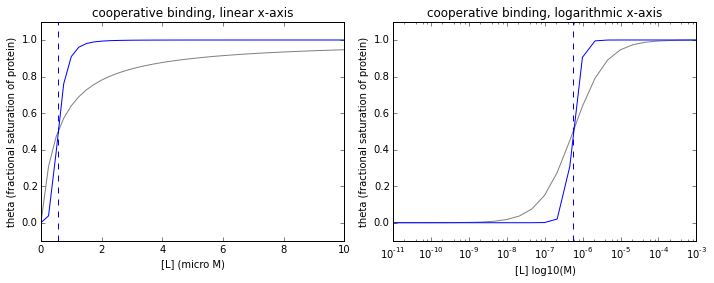

In [27]:
#Import libraries that do things like plot data and handle arrays
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display


def hill_equation(ligand_conc,Kd,n):
    """
    The Hill equation.
    """
    
    theta = (ligand_conc)**n/(ligand_conc**n + Kd**n)
    
    return theta

def plot_hill(Kd,n):
    """
    """
    
    Kd = 10**Kd

    
    # Create main plot
    fig, ax = plt.subplots(1,2)
    
    # -----------------------------
    # Linear plots
    # -----------------------------

    ligand_conc = np.arange(0,1e-5,2.5e-7)
    theta = hill_equation(ligand_conc,Kd,n)
    theta_non = hill_equation(ligand_conc,Kd,1)
    
    ax[0].plot(ligand_conc*1e6,theta_non,color="gray")
    ax[0].plot(ligand_conc*1e6,theta)
    ax[0].set_ylim([-0.1,1.1])
    ax[0].set_xlim([0,10])
    ax[0].set_title("cooperative binding, linear x-axis")
    ax[0].set_xlabel("[L] (micro M)")
    ax[0].set_ylabel("theta (fractional saturation of protein)")
    
    ax[0].axvline(x=1e6*Kd,color="blue",linestyle="dashed")
    
    # -----------------------------
    # Log plots
    # -----------------------------
    
    ligand_conc = 10**(np.arange(-11,-3,0.333,dtype=float))
    theta = hill_equation(ligand_conc,Kd,n)
    theta_non = hill_equation(ligand_conc,Kd,1)
    
    ax[1].plot(ligand_conc,theta_non,color="gray")
    ax[1].plot(ligand_conc,theta)
    ax[1].set_xscale('log')
    ax[1].set_ylim([-0.1,1.1])
    ax[1].set_title("cooperative binding, logarithmic x-axis")
    ax[1].set_xlabel("[L] log10(M)")
    ax[1].set_ylabel("theta (fractional saturation of protein)")
    
    ax[1].axvline(x=Kd,color="blue",linestyle="dashed")
    
    fig.set_figwidth(10)
    fig.tight_layout()
    plt.show()
    
    
# graph for running display
Kd_slider = widgets.FloatSlider(min=-8,max=-5,step=0.25,value=-6,description="Kd (log10(M))")
n_slider = widgets.FloatSlider(min=0.2,max=5,by=0.2,value=1.0,description="n (Hill coefficient)")

w = widgets.interactive(plot_hill,
                        Kd=Kd_slider,
                        n=n_slider)
                        
display(w)
